In [1799]:
import pandas as pd
import numpy as np 
import sklearn 
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition  import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.model_selection import cross_val_predict
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingRegressor

In [ ]:
class StackingXG(BaseEstimator, ClassifierMixin):  
 

    def __init__(self, models, ens_model, n):

        self.models = models
        self.ens_model = ens_model
        self.n = 138
        self.valid = None
        
    def bootstrap(n_samples, X):
        new_X = X.sample(n=n_samples, replace=True) 
        return new_X

        
    def fit(self, X, y=None, random_state=None, cv=3):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 100) 
        for clf in self.models:
            new_X = bootstrap(self.n, X)
            clf.fit(new_X, labels)
        return self
    


    def predict(self, X, y=None):

        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        
        
        a = self.ens_model.predict(X_meta)
        
        return (a)

In [1800]:
class Cluster(BaseEstimator, TransformerMixin):  

    def __init__(self, n_clusters = 3):
        self.n_clusters = n_clusters
        self.method = KMeans(n_clusters = self.n_clusters, random_state = 0)
        
        
    def fit(self, X, y=None):
        self.method.fit(X)       
        return self
    


    def transform(self, X, y=None):
        res = self.method.predict(X)
        X['cluster'] =  res
        return (X)

In [1801]:
def rmse_func(labels, predlabels):
    rmse = -sqrt(mean_squared_error(labels, predlabels))
    return rmse

In [1802]:
rmse = make_scorer(rmse_func)

In [1803]:
train = pd.read_csv("C:/Training_wells.csv") 
train.head(500)

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021
...,...,...,...,...
133,245-908,245,908,0.2719
134,245-911,245,911,0.3780
135,245-923,245,923,0.4239
136,246-905,246,905,0.4900


In [1804]:
test = pd.read_csv("C:/Empty_part.csv") 
test.head(500)

,Well,X,Y
0,201-901,201,901
1,201-902,201,902
2,201-903,201,903
3,201-904,201,904
4,201-905,201,905
...,...,...,...
495,219-918,219,918
496,219-919,219,919
497,219-920,219,920
498,219-921,219,921


In [1805]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
Well    138 non-null object
X       138 non-null int64
Y       138 non-null int64
NTG     138 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.4+ KB


In [1806]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 3 columns):
Well    1242 non-null object
X       1242 non-null int64
Y       1242 non-null int64
dtypes: int64(2), object(1)
memory usage: 29.2+ KB


In [1807]:
train.nunique()

Well    138
X        43
Y        30
NTG     135
dtype: int64

In [1808]:
feature_names = test.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(test[column].value_counts(dropna=False))

Well
221-913    1
209-901    1
242-926    1
228-921    1
209-915    1
          ..
225-918    1
218-926    1
213-904    1
208-901    1
239-902    1
Name: Well, Length: 1242, dtype: int64
X
213    30
236    30
233    30
209    29
220    29
234    29
246    28
230    28
202    28
214    28
217    28
221    28
222    28
224    28
227    28
223    28
231    27
218    27
203    27
204    27
206    27
208    27
243    27
210    27
212    27
242    27
229    27
240    27
201    27
235    27
228    27
239    27
238    27
245    27
241    26
226    26
205    26
232    26
237    25
211    25
216    25
225    25
244    24
215    24
207    24
219    23
Name: X, dtype: int64
Y
906    45
918    44
901    43
903    43
909    43
913    43
917    43
904    42
905    42
911    42
912    42
915    42
919    42
925    42
916    41
902    41
914    41
922    41
927    41
910    41
920    41
908    41
926    41
928    40
924    40
923    40
929    40
930    40
921    38
907    37
Name: Y, dtype: int64


In [1809]:
feature_names = train.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(train[column].value_counts(dropna=False))

Well
241-907    1
215-930    1
207-910    1
215-921    1
219-903    1
          ..
231-930    1
244-911    1
216-908    1
219-930    1
243-926    1
Name: Well, Length: 138, dtype: int64
X
219    7
244    6
215    6
207    6
237    5
211    5
216    5
225    5
226    4
241    4
232    4
205    4
210    3
218    3
208    3
206    3
245    3
201    3
204    3
228    3
212    3
203    3
231    3
235    3
238    3
239    3
240    3
242    3
243    3
229    3
202    2
246    2
214    2
217    2
221    2
222    2
224    2
227    2
230    2
223    2
209    1
220    1
234    1
Name: X, dtype: int64
Y
907    9
921    8
924    6
929    6
923    6
930    6
928    6
902    5
926    5
922    5
920    5
927    5
916    5
914    5
908    5
910    5
911    4
904    4
905    4
915    4
912    4
919    4
925    4
909    3
913    3
917    3
903    3
901    3
918    2
906    1
Name: Y, dtype: int64
NTG
0.2778    2
0.2766    2
0.3333    2
0.3973    1
0.3471    1
         ..
0.4021    1
0.2484    1
0.2171   

In [1810]:
train = train.loc[train['Well'] != '235-903']
train = train.loc[train['Well'] != '226-929']
train = train.loc[train['Well'] != '242-907']
train = train.loc[train['Well'] != '243-907']
train = train.loc[train['Well'] != '212-905']
train = train.loc[train['Well'] != '244-912']
train = train.loc[train['Well'] != '216-920']
#train = train.loc[train['Well'] != '210-916']
train = train.loc[train['Well'] != '239-922']



train

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021
...,...,...,...,...
133,245-908,245,908,0.2719
134,245-911,245,911,0.3780
135,245-923,245,923,0.4239
136,246-905,246,905,0.4900


In [1811]:
train = train.drop('Well', axis = 1) 
train

,X,Y,NTG
0,201,907,0.2006
1,201,914,0.3624
2,201,924,0.4381
3,202,922,0.4289
4,202,925,0.4021
...,...,...,...
133,245,908,0.2719
134,245,911,0.3780
135,245,923,0.4239
136,246,905,0.4900


In [1812]:
test1 = test.drop('Well', axis = 1) 
test1

,X,Y
0,201,901
1,201,902
2,201,903
3,201,904
4,201,905
...,...,...
1237,246,926
1238,246,927
1239,246,928
1240,246,929


In [1813]:
features = train.drop('NTG', axis = 1) 
labels = pd.DataFrame(train['NTG'], columns = ['NTG'])

In [1814]:
features.mean()

X    222.646154
Y    916.846154
dtype: float64

In [1815]:
test1.mean()

X    223.533816
Y    915.374396
dtype: float64

In [1816]:
features

,X,Y
0,201,907
1,201,914
2,201,924
3,202,922
4,202,925
...,...,...
133,245,908
134,245,911
135,245,923
136,246,905


In [1817]:
test1

,X,Y
0,201,901
1,201,902
2,201,903
3,201,904
4,201,905
...,...,...
1237,246,926
1238,246,927
1239,246,928
1240,246,929


In [1818]:
#clust = Cluster(n_clusters = 21)

In [1819]:
#clust.fit(features)

In [1820]:
#clust.transform(features)

In [1821]:
#clust.transform(test1)

In [1822]:
#pipe_xg12 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.246, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1823]:
#scores = cross_val_score(pipe_xg12, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
#scores.mean()

In [1824]:
#pipe_xg13 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.089, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1825]:
#scores = cross_val_score(pipe_xg13, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
#scores.mean()

In [1826]:
#pipe_xg14 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.057, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1827]:
#scores = cross_val_score(pipe_xg14, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
#scores.mean()

In [1828]:
#pipe_xg15 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.193, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1829]:
#scores = cross_val_score(pipe_xg15, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
#scores.mean()

In [1830]:
#pipe_xg16 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.099, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1831]:
#scores = cross_val_score(pipe_xg16, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
#scores.mean()

In [1832]:
#pipe_xg17 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.075, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1833]:
#scores = cross_val_score(pipe_xg17, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
#scores.mean()

In [1834]:
#pipe_xg18 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.17, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1835]:
#scores = cross_val_score(pipe_xg18, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
#scores.mean()

In [1836]:
pipe_xg19 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [1837]:
scores = cross_val_score(pipe_xg19, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.06012091991573831

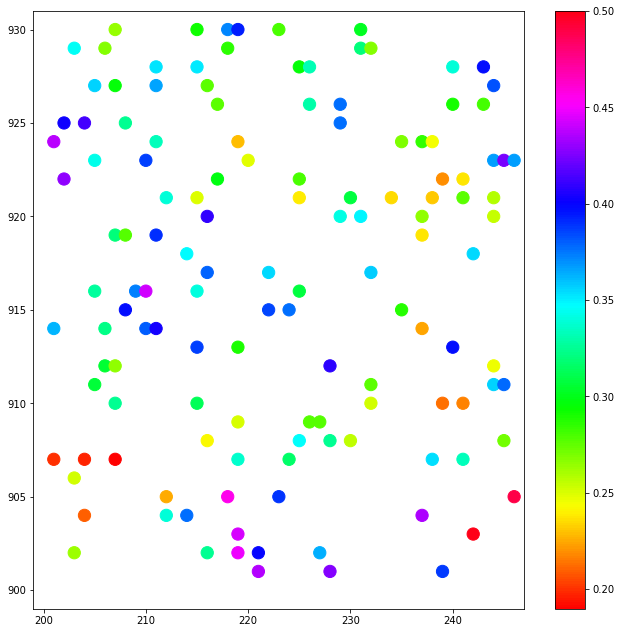

In [1639]:
x = train['X']
y = train['Y']
z = train['NTG']
plt.figure(figsize=(11,11))
plt.xlim([199, 247])
plt.ylim([899, 931])
cm = plt.get_cmap('hsv')
sc = plt.scatter(x, y, c=z, cmap=cm, s=150)
plt.colorbar(sc)
plt.show()

In [600]:
scaler = StandardScaler()

In [601]:
scaler.fit(features)

StandardScaler()

In [602]:
features_ss = scaler.transform(features)

In [603]:
features

,X,Y
0,201,907
1,201,914
2,201,924
3,202,922
4,202,925
...,...,...
133,245,908
134,245,911
135,245,923
136,246,905


In [604]:
features_ss

array([[-1.63907236, -1.10268284],
       [-1.63907236, -0.30118425],
       [-1.63907236,  0.84381373],
       [-1.56522581,  0.61481413],
       [-1.56522581,  0.95831353],
       [-1.49137926, -1.67518183],
       [-1.49137926, -1.21718264],
       [-1.49137926,  1.41631272],
       [-1.41753271, -1.44618223],
       [-1.41753271, -1.10268284],
       [-1.41753271,  0.95831353],
       [-1.34368616, -0.64468365],
       [-1.34368616, -0.07218466],
       [-1.34368616,  0.72931393],
       [-1.34368616,  1.18731312],
       [-1.26983961, -0.53018385],
       [-1.26983961, -0.30118425],
       [-1.26983961,  1.41631272],
       [-1.19599305, -1.10268284],
       [-1.19599305, -0.75918344],
       [-1.19599305, -0.53018385],
       [-1.19599305,  0.27131474],
       [-1.19599305,  1.18731312],
       [-1.19599305,  1.53081252],
       [-1.1221465 , -0.18668445],
       [-1.1221465 ,  0.27131474],
       [-1.1221465 ,  0.95831353],
       [-1.04829995, -0.07218466],
       [-0.9744534 ,

In [605]:
dbscan = DBSCAN(eps=0.44)

In [606]:
new = dbscan.fit_predict(features_ss)
new

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  2,
        2,  1,  0,  1,  2,  1,  2,  0,  0,  0,  1,  0,  0,  0, -1,  1, -1,
        1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  3,  0,
        0,  3,  3,  0,  0,  0,  3,  0,  0,  3,  3,  0,  3,  0,  0,  3,  3,
        0,  0,  3,  3,  0,  3,  0,  0,  3,  3,  0,  0,  0,  0,  3,  3,  0,
        3,  0], dtype=int64)

In [607]:
neww = pd.DataFrame(new,  columns=['metka'])

In [608]:
feature_names2 = neww.columns.tolist() 
for column in feature_names2: 
    print(column) 
    print(neww[column].value_counts(dropna=False))

metka
 0    94
 1    21
 3    17
 2     4
-1     2
Name: metka, dtype: int64


In [609]:
features['metka']=new
features

,X,Y,metka
0,201,907,0
1,201,914,0
2,201,924,0
3,202,922,0
4,202,925,0
...,...,...,...
133,245,908,3
134,245,911,3
135,245,923,0
136,246,905,3


In [610]:
labels['metka']=new
labels

,NTG,metka
0,0.2006,0
1,0.3624,0
2,0.4381,0
3,0.4289,0
4,0.4021,0
...,...,...
133,0.2719,3
134,0.3780,3
135,0.4239,0
136,0.4900,3


In [611]:
features = features.loc[features['metka'] != -1]
labels = labels.loc[labels['metka'] != -1]
features = features.drop('metka', axis=1)
labels = labels.drop('metka', axis=1)

In [612]:
pipe_xg11 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [613]:
scores = cross_val_score(pipe_xg11, features, labels, cv=5, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.07270843351441096

In [171]:
clust = Cluster(n_clusters = 11)

In [172]:
clust.fit(features)

Cluster(n_clusters=11)

In [173]:
clust.transform(features)

,X,Y,cluster
0,201,907,6
1,201,914,9
2,201,924,4
3,202,922,4
4,202,925,4
...,...,...,...
133,245,908,3
134,245,911,3
135,245,923,10
136,246,905,3


In [174]:
clust.transform(test1)

,X,Y,cluster
0,201,901,6
1,201,902,6
2,201,903,6
3,201,904,6
4,201,905,6
...,...,...,...
1237,246,926,10
1238,246,927,10
1239,246,928,10
1240,246,929,10


In [199]:
pipe1 = Pipeline([("scaler", StandardScaler()), ('XGBoost', XGBRegressor(random_state=0, n_estimators=93, learning_rate=0.1, max_depth=2))])

In [785]:
pipe2 = Pipeline([("scaler", StandardScaler()), ('SVM', SVR(kernel='rbf', C=0.1, gamma=228))])

In [310]:
pipe3 = Pipeline([("scaler", StandardScaler()), ('RandomForest', RandomForestRegressor(random_state=0, n_estimators=10000, max_features=2, max_depth=4))])

In [311]:
pipe4 = Pipeline([("scaler", StandardScaler()), ('Ridge', Ridge(alpha=100000))])

In [312]:
pipe5 = Pipeline([("scaler", StandardScaler()), ('KNN', KNeighborsRegressor(n_neighbors=2))])

In [313]:
param_grid2 = {
    #'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'SVM__gamma': [100, 228, 300]
}

In [314]:
param_grid3 = {
    'RandomForest__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'RandomForest__max_features': [1, 2, 3]
}

In [315]:
param_grid4 = {
    'Ridge__alpha': [500000],
}

In [316]:
param_grid5 = {
    'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

In [590]:
grid = GridSearchCV(pipe2, param_grid2, cv=3, scoring = 'neg_root_mean_squared_error')

In [256]:
grid.fit(features, labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('MinMax', StandardScaler()),
                                       ('SVM', SVR(C=0.1))]),
             param_grid={'SVM__gamma': [100, 228, 300]},
             scoring=make_scorer(rmse_func))

In [257]:
grid.best_params_

{'SVM__gamma': 228}

In [258]:
predlabels = grid.predict(features)

In [259]:
-sqrt(mean_squared_error(labels, predlabels))

-0.06412481755223425

In [260]:
grid.best_score_

-0.07162679111906355

In [ ]:
#Отправка 1(c Kmeans)

In [415]:
#pipe_xg = Pipeline([("scaler", StandardScaler()), ('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=61, learning_rate=0.08, max_depth=2), n_estimators=11, max_samples=1.0, max_features=1.0, random_state=0))])

In [1206]:
pipe_xg = Pipeline([("scaler", StandardScaler()), ('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=103, learning_rate=0.04, max_depth=2), n_estimators=11, max_samples=1.0, max_features=1.0, random_state=0))])

In [1207]:
scores = cross_val_score(pipe_xg, features, labels, cv=3, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.06788835388062761

In [756]:
pipe_xg.fit(features, labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost',
                 BaggingRegressor(base_estimator=XGBRegressor(base_score=None,
                                                              booster=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=None,
                                                              gamma=None,
                                                              gpu_id=None,
                                                              importance_type='gain',
                                                              interaction_constraints=None,
                                                              learning_rate=0.04,
                                                              max_delta_step=None,
                       

In [757]:
pipe_xg_pred = pipe_xg.predict(features)

In [758]:
-sqrt(mean_squared_error(labels, pipe_xg_pred))

-0.050690277078783416

In [759]:
pipe_xg_test = pipe_xg.predict(test1)

In [760]:
pipe_xg_test

array([0.322549  , 0.32105863, 0.33073214, ..., 0.36690313, 0.3694874 ,
       0.37065142], dtype=float32)

In [761]:
test['NTG'] = pipe_xg_test
test

,Well,X,Y,NTG
0,201-901,201,901,0.322549
1,201-902,201,902,0.321059
2,201-903,201,903,0.330732
3,201-904,201,904,0.310693
4,201-905,201,905,0.293321
...,...,...,...,...
1237,246-926,246,926,0.357804
1238,246-927,246,927,0.365912
1239,246-928,246,928,0.366903
1240,246-929,246,929,0.369487


In [762]:
test.to_csv("D:/Empty_part.csv", header=True, index=False)

In [ ]:
#Отправка 2(c Kmeans)

In [1208]:
pipe_xg2 = Pipeline([("scaler", StandardScaler()), ('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=110, learning_rate=0.04, max_depth=2), n_estimators=39, max_samples=1.0, max_features=1.0, random_state=0))])

In [1209]:
scores = cross_val_score(pipe_xg2, features, labels, cv=5, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.06945049544365292

In [788]:
pipe_xg2.fit(features, labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost',
                 BaggingRegressor(base_estimator=XGBRegressor(base_score=None,
                                                              booster=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=None,
                                                              gamma=None,
                                                              gpu_id=None,
                                                              importance_type='gain',
                                                              interaction_constraints=None,
                                                              learning_rate=0.04,
                                                              max_delta_step=None,
                       

In [789]:
pipe_xg_pred = pipe_xg2.predict(features)

In [790]:
-sqrt(mean_squared_error(labels, pipe_xg_pred))

-0.04988876412168504

In [791]:
pipe_xg_test = pipe_xg2.predict(test1)

In [792]:
pipe_xg_test

array([0.31313846, 0.3096851 , 0.32635796, ..., 0.37700576, 0.37788418,
       0.37686336], dtype=float32)

In [793]:
test['NTG'] = pipe_xg_test
test

,Well,X,Y,NTG
0,201-901,201,901,0.313138
1,201-902,201,902,0.309685
2,201-903,201,903,0.326358
3,201-904,201,904,0.300065
4,201-905,201,905,0.292451
...,...,...,...,...
1237,246-926,246,926,0.370097
1238,246-927,246,927,0.375813
1239,246-928,246,928,0.377006
1240,246-929,246,929,0.377884


In [795]:
test.to_csv("D:/Empty_part.csv", header=True, index=False)

In [ ]:
#Отправка 3(без Kmeans)

In [1394]:
pipe_xg3 = Pipeline([("scaler", StandardScaler()), ('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.05, max_depth=2), n_estimators=8, max_samples=1.0, max_features=1.0, random_state=0))])

In [1395]:
scores = cross_val_score(pipe_xg3, features, labels, cv=3, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.0675206536479424

In [911]:
pipe_xg3.fit(features, labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost',
                 BaggingRegressor(base_estimator=XGBRegressor(base_score=None,
                                                              booster=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=None,
                                                              gamma=None,
                                                              gpu_id=None,
                                                              importance_type='gain',
                                                              interaction_constraints=None,
                                                              learning_rate=0.05,
                                                              max_delta_step=None,
                       

In [912]:
pipe_xg_pred = pipe_xg3.predict(features)

In [913]:
-sqrt(mean_squared_error(labels, pipe_xg_pred))

-0.048994722427510566

In [914]:
pipe_xg_test = pipe_xg3.predict(test1)

In [915]:
pipe_xg_test

array([0.29146728, 0.29030922, 0.3040568 , ..., 0.370234  , 0.37157333,
       0.37410992], dtype=float32)

In [916]:
test['NTG'] = pipe_xg_test
test

,Well,X,Y,NTG
0,201-901,201,901,0.291467
1,201-902,201,902,0.290309
2,201-903,201,903,0.304057
3,201-904,201,904,0.283657
4,201-905,201,905,0.281681
...,...,...,...,...
1237,246-926,246,926,0.356893
1238,246-927,246,927,0.368596
1239,246-928,246,928,0.370234
1240,246-929,246,929,0.371573


In [917]:
test.to_csv("D:/Empty_part.csv", header=True, index=False)

In [ ]:
#Отправка 4(без Kmeans)

In [1420]:
pipe_xg4 = Pipeline([("scaler", StandardScaler()), ('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=2), n_estimators=6, max_samples=1.0, max_features=1.0, random_state=0))])

In [1421]:
scores = cross_val_score(pipe_xg4, features, labels, cv=5, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.06960841236228862

In [1838]:
pipe_xg19.fit(features, labels)

Pipeline(steps=[('XGBoost',
                 BaggingRegressor(base_estimator=XGBRegressor(base_score=None,
                                                              booster=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=None,
                                                              gamma=None,
                                                              gpu_id=None,
                                                              importance_type='gain',
                                                              interaction_constraints=None,
                                                              learning_rate=0.1,
                                                              max_delta_step=None,
                                                              max_dept

In [1839]:
pipe_xg_pred = pipe_xg19.predict(features)

In [1840]:
-sqrt(mean_squared_error(labels, pipe_xg_pred))

-0.03724362988415209

In [1841]:
pipe_xg_test = pipe_xg19.predict(test1)

In [1842]:
pipe_xg_test

array([0.279082  , 0.27466625, 0.2777175 , ..., 0.391145  , 0.38252702,
       0.3834249 ], dtype=float32)

In [1843]:
test['NTG'] = pipe_xg_test
test

,Well,X,Y,NTG
0,201-901,201,901,0.279082
1,201-902,201,902,0.274666
2,201-903,201,903,0.277718
3,201-904,201,904,0.265531
4,201-905,201,905,0.265495
...,...,...,...,...
1237,246-926,246,926,0.375338
1238,246-927,246,927,0.382584
1239,246-928,246,928,0.391145
1240,246-929,246,929,0.382527


In [1844]:
test.to_csv("D:/Empty_part.csv", header=True, index=False)

In [1142]:
#Отправка 5 покрутить колво деревьев

In [2351]:
pipe_xg4 = Pipeline([("scaler", StandardScaler()), ('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.04, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [2352]:
scores = cross_val_score(pipe_xg4, features, labels, cv=5, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.07036425761428883

In [ ]:
#Отправка 6

In [1173]:
pipe_xg4 = Pipeline([("scaler", StandardScaler()), ('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.04, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [200]:
#Отправка 7 без класт

In [225]:
pipe_xg7 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.153, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [226]:
scores = cross_val_score(pipe_xg7, features, labels, cv=5, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.07147874495648197

In [2306]:
#Отправка 8 класт

In [223]:
pipe_xg8 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.041, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [224]:
scores = cross_val_score(pipe_xg8, features, labels, cv=5, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.07024088927620445

In [ ]:
#Отправка 9 без класт loo

In [116]:
loo = LeaveOneOut()

In [1584]:
pipe_xg9 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.22, max_depth=2), n_estimators=5000, max_samples=1.0, max_features=1.0, random_state=0))])

In [1585]:
scores = cross_val_score(pipe_xg9, features, labels, cv=loo, scoring = 'neg_root_mean_squared_error')
scores.mean()

KeyboardInterrupt: 

In [ ]:
#Отправка 10 минус выбросы

In [746]:
#235-903
#226-929
#242-907
#243-907
#212-905
#244-912

In [163]:
train = train.loc[train['Well'] != '235-903']
train = train.loc[train['Well'] != '226-929']
train = train.loc[train['Well'] != '242-907']
train = train.loc[train['Well'] != '243-907']
train = train.loc[train['Well'] != '212-905']
train = train.loc[train['Well'] != '244-912']


train

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021
...,...,...,...,...
133,245-908,245,908,0.2719
134,245-911,245,911,0.3780
135,245-923,245,923,0.4239
136,246-905,246,905,0.4900


In [15]:


train

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021
...,...,...,...,...
133,245-908,245,908,0.2719
134,245-911,245,911,0.3780
135,245-923,245,923,0.4239
136,246-905,246,905,0.4900


In [30]:
pipe_xg10 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.47, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [31]:
scores = cross_val_score(pipe_xg10, features, labels, cv=5, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.05982424574594427

In [32]:
#Отправка 11 минус выбросы

In [33]:
pipe_xg11 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.09, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [34]:
scores = cross_val_score(pipe_xg11, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.05814640390479392

In [23]:
#Отправка 12 минус выбросы

In [49]:
pipe_xg12 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [50]:
scores = cross_val_score(pipe_xg12, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.05831649855423948

In [ ]:
#Отправка 13 минус выбросы

In [138]:
train = train.loc[train['Well'] != '235-903']
train = train.loc[train['Well'] != '226-929']
train = train.loc[train['Well'] != '242-907']
train = train.loc[train['Well'] != '243-907']
train = train.loc[train['Well'] != '212-905']
train = train.loc[train['Well'] != '244-912']


train

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021
...,...,...,...,...
133,245-908,245,908,0.2719
134,245-911,245,911,0.3780
135,245-923,245,923,0.4239
136,246-905,246,905,0.4900


In [175]:
pipe_xg13 = Pipeline([('XGBoost', BaggingRegressor(XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=2), n_estimators=10, max_samples=1.0, max_features=1.0, random_state=0))])

In [176]:
scores = cross_val_score(pipe_xg13, features, labels, cv=10, scoring = 'neg_root_mean_squared_error')
scores.mean()

-0.057850106368717624

In [ ]:
#Отправка 11 класт

In [2298]:
pipe11 = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(include_bias=False)), ('ridge', Ridge())])

In [2299]:
param_grid11 = {
    'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ridge__alpha': [100, 1000, 3000, 5000, 10000, 15000, 20000, 25000, 30000]
}

In [2300]:
grid = GridSearchCV(pipe11, param_grid11, cv=5, scoring = 'neg_root_mean_squared_error')

In [2301]:
grid.fit(features, labels)

KeyboardInterrupt: 

In [ ]:
pipe_xg_pred = pipe_xg.predict(features)

In [ ]:
-sqrt(mean_squared_error(labels, pipe_xg_pred))

In [ ]:
pipe_xg_test = pipe_xg2.predict(test1)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_